In [52]:
#Lag en modell som predikerer tilsvarende NOT-operatoren.
#Visualiser resultatet etter optimaliseringen av modellen.

In [53]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [54]:
#base tensors
x_train = torch.tensor([[0.0],[1.0]]).reshape(-1,1)
y_train = torch.tensor([[1.0],[0.0]]).reshape(-1,1)

In [55]:
class NOToperator:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))

    def logits(self, x):
        return x @ self.W + self.b

    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x),y)

model = NOToperator()


In [56]:

optimizer = torch.optim.SGD([model.W, model.b], 0.1)
for epoch in range(10000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()  # Clear gradients for next step

W = tensor([[-10.5934]], requires_grad=True), b = tensor([[5.0927]], requires_grad=True), loss = tensor(0.0051, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


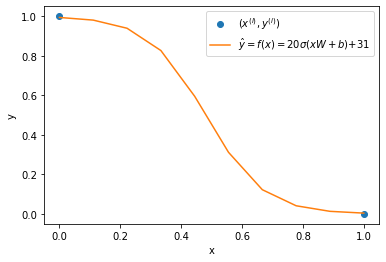

In [57]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)}, y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.linspace(torch.min(x_train), torch.max(x_train), 10).reshape(-1, 1)
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = 20\\sigma(xW+b$)+31')
plt.legend()
plt.show()


In [58]:
torch.logical_not(x_train)



tensor([[ True],
        [False]])